<a href="https://colab.research.google.com/github/ammalik221/Mini-Projects/blob/master/UDL_Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
def activation(x):
    return 1/(1+torch.exp(-x))


torch.manual_seed(7)

features = torch.randn((1, 5))
weights = torch.randn_like(features)
bias = torch.randn((1,1))

In [ ]:
activation(torch.sum(features * weights)+bias)

tensor([[0.1595]])

In [ ]:
activation(torch.mm(features, weights.view(5, 1)) + bias)

tensor([[0.1595]])

In [ ]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

activation(torch.mm(activation(torch.mm(features, W1)+B1), W2) + B2)

tensor([[0.3171]])

In [ ]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


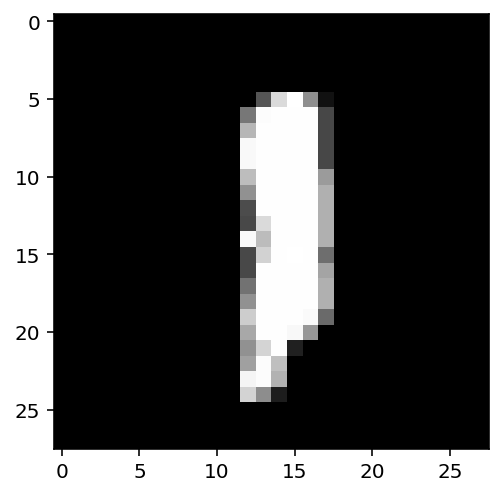

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.shape

torch.Size([64, 1, 28, 28])

In [ ]:
features = images.view((64, 784))

n_hidden = 256
n_output = 10

W1 = torch.randn((784, 256))
W2 = torch.randn((256, 10))

B1 = torch.randn((1, 256))
B2 = torch.randn((1, 10))

h = activation(torch.mm(features, W1) + B1)
output = torch.mm(h, W2) + B2

In [ ]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [ ]:
output.shape

torch.Size([64, 10])

In [ ]:
torch.exp(output).shape

torch.Size([64, 10])

In [ ]:
torch.sum(torch.exp(output), dim=0)

tensor([6.5813e+01, 7.7473e+07, 1.5276e+13, 7.9376e+02, 2.3407e+01, 3.8328e+06,
        3.9488e+10, 2.0661e+09, 4.4633e+01, 1.1263e+01])

In [ ]:
torch.sum(torch.exp(output), dim=1).view(-1, 1).shape

torch.Size([64, 1])

In [ ]:
softmax(output)

tensor([[2.6591e-12, 1.3560e-08, 9.9993e-01, 1.8487e-16, 5.2601e-12, 7.2524e-07,
         6.4678e-05, 2.5419e-09, 4.6269e-14, 8.9339e-10],
        [2.6379e-14, 3.3120e-10, 9.9995e-01, 4.8209e-08, 5.3354e-15, 3.0273e-08,
         4.9945e-05, 4.7734e-06, 2.4473e-18, 1.6429e-12],
        [2.6795e-09, 9.2524e-01, 7.1227e-02, 1.4859e-12, 1.3822e-11, 3.5223e-03,
         1.1177e-05, 1.6120e-09, 4.2020e-12, 6.3344e-14],
        [3.9065e-09, 5.3518e-10, 2.3106e-01, 1.9992e-10, 1.2192e-16, 8.8235e-07,
         7.6883e-01, 1.0524e-04, 6.7972e-15, 1.2574e-14],
        [5.8432e-09, 1.0561e-02, 3.7484e-01, 4.1062e-12, 4.6713e-09, 6.1304e-01,
         1.4430e-03, 1.1335e-04, 2.5252e-09, 4.7697e-14],
        [2.8386e-10, 1.5278e-07, 9.9981e-01, 1.4710e-07, 2.3932e-13, 3.5870e-08,
         1.9292e-04, 1.3969e-07, 2.4296e-15, 3.1682e-16],
        [3.6730e-07, 2.5149e-05, 5.1183e-01, 1.0455e-10, 4.2453e-11, 8.8307e-05,
         4.8460e-01, 3.4581e-03, 1.7187e-09, 9.9564e-10],
        [3.2687e-09, 1.2102

In [ ]:
from torch import nn

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.hidden = nn.Linear(256, 10)

        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

model = Network()
model

Network(
  (hidden): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [ ]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)

        return x

In [ ]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.h1 = nn.Linear(784, 128)
        self.h2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = F.softmax(self.output(x), dim=1)

        return x

model = Network()
model

Network(
  (h1): Linear(in_features=784, out_features=128, bias=True)
  (h2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
model.h1.weight

Parameter containing:
tensor([[ 0.0099, -0.0177,  0.0273,  ...,  0.0248, -0.0324, -0.0042],
        [ 0.0108, -0.0106,  0.0013,  ...,  0.0162,  0.0053,  0.0311],
        [ 0.0011, -0.0232,  0.0004,  ..., -0.0083,  0.0281,  0.0186],
        ...,
        [ 0.0214, -0.0085, -0.0170,  ...,  0.0318, -0.0219, -0.0265],
        [-0.0058, -0.0153,  0.0346,  ..., -0.0188, -0.0293,  0.0329],
        [-0.0307,  0.0050,  0.0240,  ..., -0.0224,  0.0083, -0.0011]],
       requires_grad=True)

In [ ]:
import helper

dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

img_idx=0
ps = model.forward(images[img_idx, : ])

img = images[img_idx]
helper.view_classify(img.view(1,28,28), ps)

In [ ]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

NameError: ignored

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, )),
                                ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3009, grad_fn=<NllLossBackward>)


In [ ]:
## Solution

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.2983, grad_fn=<NllLossBackward>)


In [ ]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 1.3787e-04,  1.3787e-04,  1.3787e-04,  ...,  1.3787e-04,
          1.3787e-04,  1.3787e-04],
        [ 1.3137e-03,  1.3137e-03,  1.3137e-03,  ...,  1.3137e-03,
          1.3137e-03,  1.3137e-03],
        [ 9.6271e-04,  9.6271e-04,  9.6271e-04,  ...,  9.6271e-04,
          9.6271e-04,  9.6271e-04],
        ...,
        [-1.3502e-03, -1.3502e-03, -1.3502e-03,  ..., -1.3502e-03,
         -1.3502e-03, -1.3502e-03],
        [ 5.7897e-03,  5.7897e-03,  5.7897e-03,  ...,  5.7897e-03,
          5.7897e-03,  5.7897e-03],
        [-1.1711e-06, -1.1711e-06, -1.1711e-06,  ..., -1.1711e-06,
         -1.1711e-06, -1.1711e-06]])


In [ ]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0193, -0.0051,  0.0247,  ...,  0.0021, -0.0296,  0.0054],
        [ 0.0069, -0.0255,  0.0177,  ...,  0.0170,  0.0209,  0.0246],
        [ 0.0031,  0.0095, -0.0160,  ...,  0.0019, -0.0046, -0.0288],
        ...,
        [ 0.0274,  0.0184, -0.0098,  ..., -0.0268, -0.0140, -0.0021],
        [ 0.0325,  0.0316, -0.0283,  ..., -0.0264,  0.0281,  0.0209],
        [ 0.0322,  0.0008,  0.0066,  ...,  0.0328,  0.0052, -0.0225]],
       requires_grad=True)
Gradient - tensor([[ 0.0045,  0.0045,  0.0045,  ...,  0.0045,  0.0045,  0.0045],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        ...,
        [-0.0028, -0.0028, -0.0028,  ..., -0.0028, -0.0028, -0.0028],
        [ 0.0034,  0.0034,  0.0034,  ...,  0.0034,  0.0034,  0.0034],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007]])


In [ ]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0193, -0.0052,  0.0247,  ...,  0.0020, -0.0297,  0.0054],
        [ 0.0069, -0.0256,  0.0177,  ...,  0.0170,  0.0209,  0.0246],
        [ 0.0031,  0.0095, -0.0160,  ...,  0.0019, -0.0045, -0.0287],
        ...,
        [ 0.0274,  0.0184, -0.0098,  ..., -0.0268, -0.0139, -0.0020],
        [ 0.0325,  0.0316, -0.0283,  ..., -0.0265,  0.0281,  0.0208],
        [ 0.0322,  0.0008,  0.0066,  ...,  0.0328,  0.0052, -0.0225]],
       requires_grad=True)


In [ ]:
model = nn.Sequential(nn.Linear(784, 128),                    
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9731172618072932
Training loss: 0.9275380919482916
Training loss: 0.5541737181291397
Training loss: 0.44759568498968316
Training loss: 0.3980184235234759


In [ ]:
print()

In [ ]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
#helper.view_classify(img.view(1, 28, 28), ps)
print(ps)

tensor([[4.6411e-03, 4.3775e-04, 9.7335e-01, 8.9191e-04, 9.6401e-04, 6.8021e-04,
         2.9109e-03, 4.5906e-03, 7.9654e-03, 3.5710e-03]])


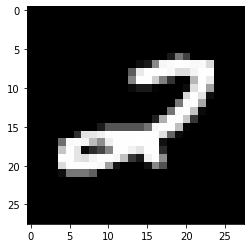

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

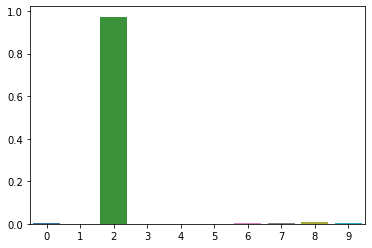

In [ ]:
import seaborn as sns
import numpy as np

classes = np.arange(0, 10)
sns.barplot(classes, ps.numpy().squeeze())

In [ ]:
############### fashion mnist ######################

import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!



/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
from torch import nn
from torch import optim


model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        img = images.view(images.shape[0], -1)

        optimizer.zero_grad()        
        output = model(img)

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        print(f"Training loss: {running_loss}")

Training loss: 479.9933708310127
Training loss: 366.11837661266327
Training loss: 332.72450333833694
Training loss: 311.48793441057205
Training loss: 298.9257377833128


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    ps = torch.exp(model(img))
#helper.view_classify(img.view(1, 28, 28), ps)
print(ps)

tensor([[2.7312e-09, 1.0000e+00, 3.1415e-13, 1.1093e-08, 2.5977e-12, 9.3273e-14,
         1.3266e-07, 1.5455e-21, 4.4697e-11, 1.2906e-20]])


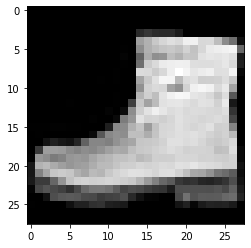

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

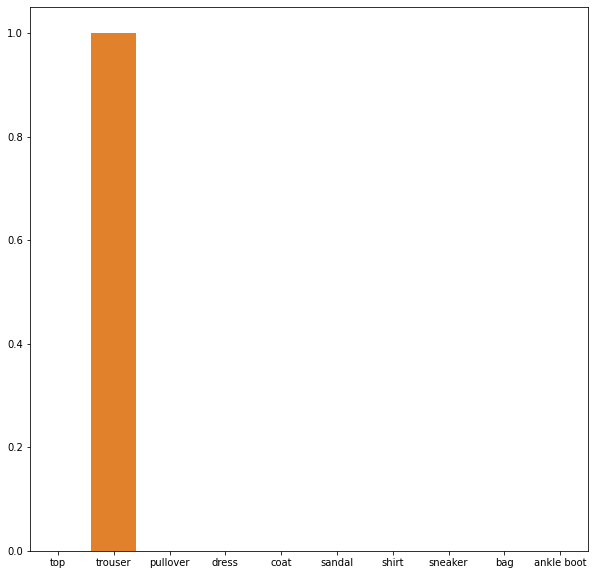

In [ ]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

#classes = np.arange(0, 10)
classes = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
sns.barplot(classes, ps.numpy().squeeze(), ax=ax)

In [ ]:
trainset.data.shape

torch.Size([60000, 28, 28])

Training loss: 0.5142028380050334
Training loss: 0.3872584572224729
Training loss: 0.3522827362359714
Training loss: 0.33094107892626384
Training loss: 0.31352904551763777


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


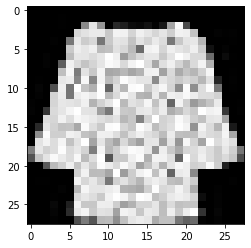

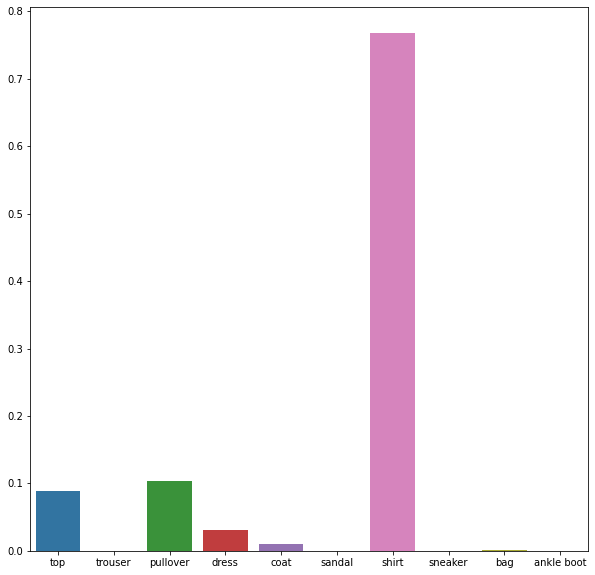

In [ ]:
from torch import nn, optim
import torch.nn.functional as F


class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

# TODO: Create the network, define the criterion and optimizer
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# TODO: Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    ps = torch.exp(model(img))

import matplotlib.pyplot as plt
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))

#classes = np.arange(0, 10)
classes = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
sns.barplot(classes, ps.numpy().squeeze(), ax=ax)

In [ ]:
####################### inference ############################

import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [ ]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3]])


In [ ]:
top_p[:10,:]

tensor([[0.1149],
        [0.1131],
        [0.1179],
        [0.1172],
        [0.1158],
        [0.1103],
        [0.1119],
        [0.1178],
        [0.1118],
        [0.1182]], grad_fn=<SliceBackward>)

In [ ]:
equals = top_class == labels.view(*top_class.shape)

In [ ]:
equals

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False

In [ ]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy : {accuracy.item()*100}%')

Accuracy : 15.625%


Epoch 1 - loss 4.5775:   1%|          | 448/60000 [00:00<00:23, 2520.30it/s]

Epoch: 1/5..  Training Loss: 0.858..  Test Loss: 0.622..  Test Accuracy: 0.775


Epoch 2 - loss 4.3375:   1%|          | 448/60000 [00:00<00:22, 2696.08it/s]

Epoch: 2/5..  Training Loss: 0.684..  Test Loss: 0.634..  Test Accuracy: 0.776


Epoch 3 - loss 7.0952:   1%|          | 384/60000 [00:00<00:25, 2330.79it/s]

Epoch: 3/5..  Training Loss: 0.722..  Test Loss: 0.712..  Test Accuracy: 0.751


Epoch 4 - loss 5.8739:   1%|          | 448/60000 [00:00<00:22, 2644.70it/s]

Epoch: 4/5..  Training Loss: 0.851..  Test Loss: 0.744..  Test Accuracy: 0.762


Epoch 4 - loss 1002.8874: 100%|██████████| 60000/60000 [00:24<00:00, 2418.04it/s]

Epoch: 5/5..  Training Loss: 1.069..  Test Loss: 1.131..  Test Accuracy: 0.534


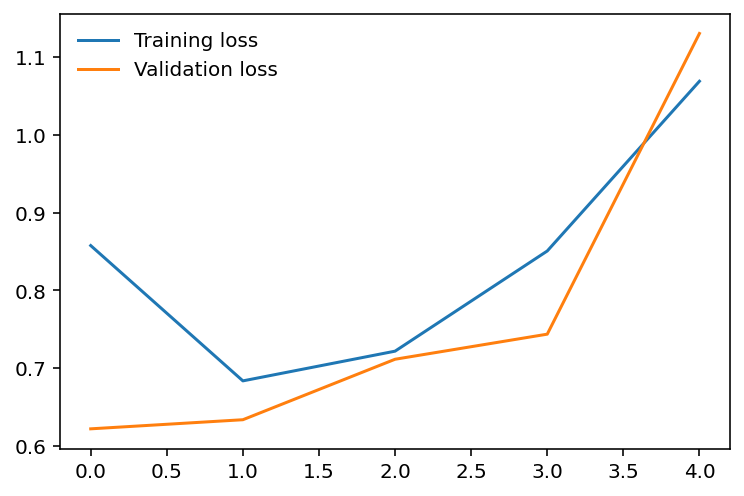

In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



from torch import nn, optim
import torch.nn.functional as F
        
class Classifier(nn.Module):
      def __init__(self):
          super().__init__()

          self.fc1 = nn.Linear(784, 256)
          self.fc2 = nn.Linear(256, 128)
          self.fc3 = nn.Linear(128, 64)
          self.fc4 = nn.Linear(64, 10)

      def forward(self, x):
          x = x.view(x.shape[0], -1)

          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = F.relu(self.fc3(x))
          x = F.log_softmax(self.fc4(x), dim=1)

          return x

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

epochs = 30
steps = 0

train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()

        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
            for images, labels in testloader:
                logits = model(images)
                test_loss += criterion(logits, labels)
                ps = torch.exp(logits)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)

                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
        

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)




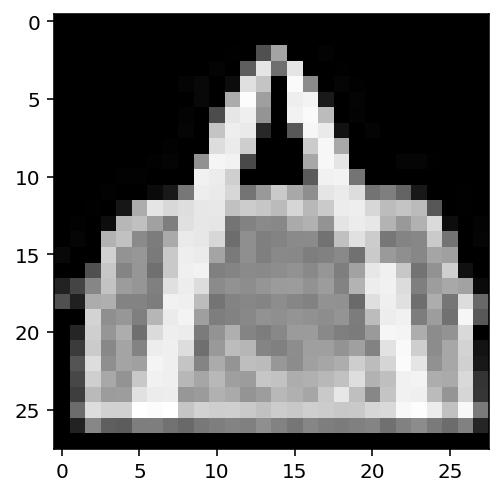

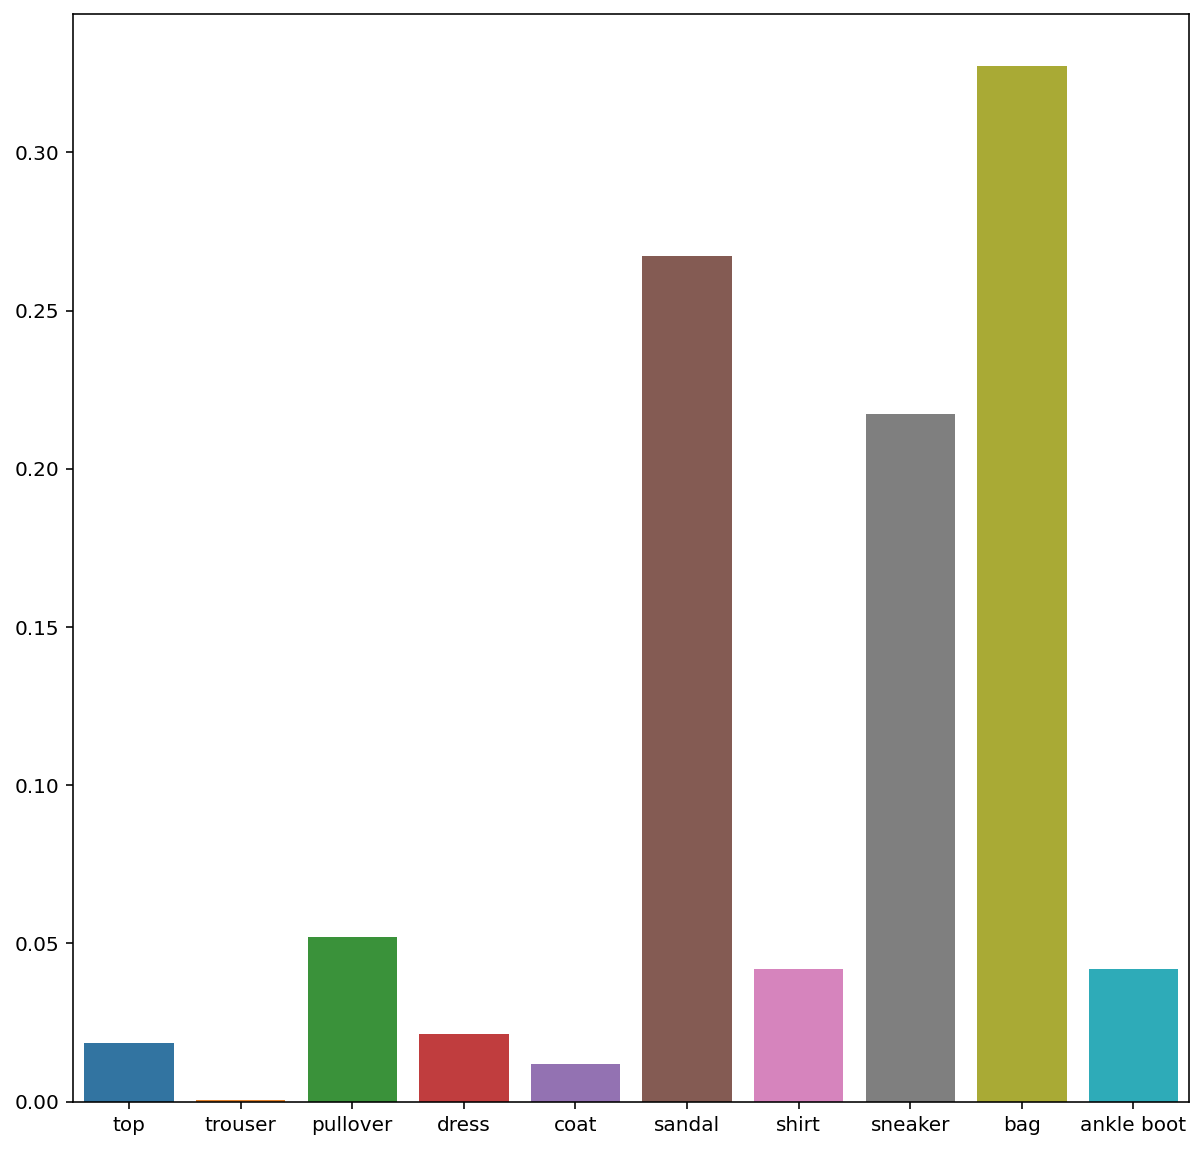

In [ ]:
model.eval()

img = images[50]

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)
    ps = torch.exp(model(img))

import matplotlib.pyplot as plt
plt.imshow(img.numpy().squeeze(), cmap='Greys_r');


import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))

#classes = np.arange(0, 10)
classes = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
sns.barplot(classes, ps.numpy().squeeze(), ax=ax)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...



Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Epoch: 1/30..  Training Loss: 0.605..  Test Loss: 0.491..  Test Accuracy: 0.818
Epoch: 2/30..  Training Loss: 0.481..  Test Loss: 0.429..  Test Accuracy: 0.841
Epoch: 3/30..  Training Loss: 0.448..  Test Loss: 0.421..  Test Accuracy: 0.846
Epoch: 4/30..  Training Loss: 0.431..  Test Loss: 0.411..  Test Accuracy: 0.851
Epoch: 5/30..  Training Loss: 0.420..  Test Loss: 0.398..  Test Accuracy: 0.854
Epoch: 6/30..  Training Loss: 0.410..  Test Loss: 0.410..  Test Accuracy: 0.853
Epoch: 7/30..  Training Loss: 0.406..  Test Loss: 0.391..  Test Accuracy: 0.864
Epoch: 8/30..  Training Loss: 0.398..  Test Loss: 0.376..  Test Accuracy: 0.865
Epoch: 9/30..  Training Loss: 0.398..  Test Loss: 0.390..  Test Accuracy: 0.861
Epoch: 10/30..  Training Loss: 0.393..  Test Loss: 0.404..  Test Accuracy: 0.854
Epoch: 11/30..  Training Loss: 0.384..  Test Loss: 0.404..  Test Accuracy: 0.860
Epoch: 12/30..  Training Loss: 0.386..  Test Loss: 0.394..  Test Accuracy: 0.866
Epoch: 13/30..  Training Loss: 0.381.

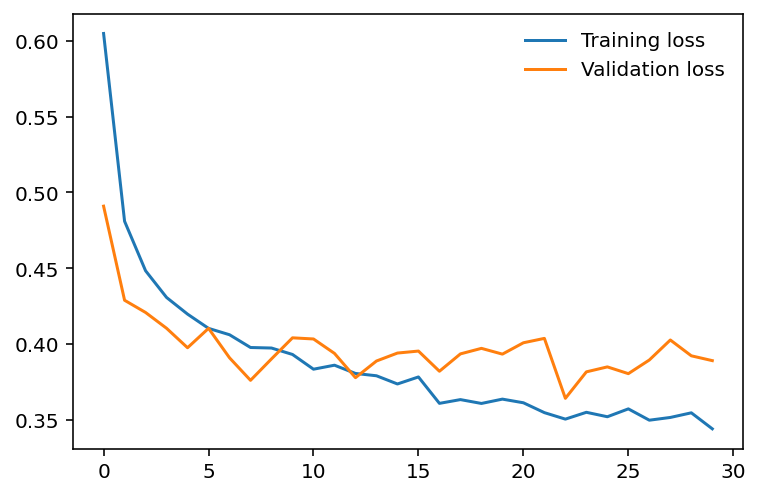

In [ ]:
import torch
from torchvision import datasets, transforms
from tqdm import trange

from tqdm import tqdm
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



from torch import nn, optim
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
        
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt


plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [ ]:
######################### saving and loading #####################

print("Our model: \n\n", model, '\n')

Our model: 

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 



In [ ]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layer_1': 256,
              'hidden_layer_2': 128,
              'hidden_layer_3': 64,
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    #model = fc_model.Network(checkpoint['input_size'],
                             #checkpoint['output_size'],
                             #checkpoint['hidden_layer_1'],
                             #checkpoint['hidden_layer_2'],
                             #checkpoint['hidden_layer_3'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [ ]:
model = load_checkpoint('checkpoint.pth')
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
################# image data ########################

import os
os.chdir('drive/My Drive')

In [ ]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [ ]:
import zipfile
with zipfile.ZipFile("Cat_Dog_data.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

In [ ]:
data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
images, labels = next(iter(dataloader))



In [ ]:
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [ ]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    plt.imshow(images[ii], ax=ax, normalize=False)

In [ ]:
###################### transfer learning #########################3

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

data_dir = 'Cat_Dog_data'

train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])



# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [ ]:
model = models.densenet121(pretrained=True)

model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
for param in model.parameters():
    param.require_grad = False


from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 512)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(512, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

model.classifier = classifier

In [ ]:
import time

for device in ['cpu', 'cuda']:

    criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    model.to(device)

    for ii, (inputs, labels) in enumerate(trainloader):

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

In [ ]:
model = models.densenet121(pretrained=True)
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:

################ full network #########################

from collections import OrderedDict
import torch
from torch import nn

from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models


data_dir = 'drive/My Drive/Cat_Dog_data'

train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])



# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);


epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in range(epochs):
    for inputs, labels in trainloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            model.train()

In [9]:
######################################################
################# Basic Operations ###################
######################################################

import torch

""" torch tensors are similar to numpy's ndarray, the difference is just 
that, they can be easily transferred to GPU. Any operation that we want 
to perform on ndarray can also be performed on tensors.
"""

# a 2x3 tensor
n_tensor = torch.Tensor([[1,2,3],
                         [5,6,7]])
print("New Tensor - \n", n_tensor, "\n", "\n")

# a 2x3 tensor of zeros
z_tensor = torch.zeros(2, 3)
print("Tensor with all zeros - \n", z_tensor, "\n")

# a 2x3 tensor of random values in the range [0, 1)
r_tensor = torch.rand(2, 3)
print("Tensor with random value - \n", r_tensor, "\n")

# accessing a scalar object
s_tensor = torch.Tensor([[1,2,3],
                         [5,6,7]])
print("Element at a position - \n", s_tensor[0][1].item(), "\n")

# slicing
slice_tensor = torch.Tensor([[1,2,3],
                             [5,6,7]])
print("All rows, first column\n", slice_tensor[:, 0], "\n")
print("All rows, last column\n", slice_tensor[:, -1], "\n")
print("All columns, first row\n", slice_tensor[0, :], "\n")
print("All columns, last column\n", slice_tensor[-1, :], "\n")

# info of tensor
i_tensor = torch.Tensor([[1,2,3],
                         [5,6,7],
                         [8,9,10]])
print("Type - \n", i_tensor.type(), "\n")
print("Shape - \n", i_tensor.shape, "\n")
print("Dimensions - \n", i_tensor.dim(), "\n")

# reshape
re_tensor = torch.Tensor([[1, 2], [3, 4]])
print("Tensor before reshaping - \n", re_tensor, "\n")

re_tensor.view(1, 4)
print("Tensor after reshaping - \n", re_tensor, "\n")

# to and from numpy
nm_tensor = torch.Tensor([[1, 2], [3, 4]])
print("Type before changing tensor to array - ", type(nm_tensor), "\n")
nm_array = nm_tensor.numpy()
print("Type before changing tensor to array - ", type(nm_array), "\n")

# tensor operations
a = torch.randn(3, 3)
b = torch.randn(3, 3)

print("Tensor A - \n", a, "\n")
print("Tensor B - \n", b, "\n")
print("Transpose\n", a.t(), "\n")
print("Matrix Multiplication\n", a.mm(b), "\n")
print("Element-wise multiplication\n", a.mul(b), "\n")

# cuda related operations
print("True if GPU is available\n", torch.cuda.is_available(), "\n")

# transfer tensor to CPU
a.cpu()

# transfer tensor to GPU
a.cuda()

New Tensor - 
 tensor([[1., 2., 3.],
        [5., 6., 7.]]) 
 

Tensor with all zeros - 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 

Tensor with random value - 
 tensor([[0.4828, 0.2108, 0.1211],
        [0.6685, 0.1417, 0.6754]]) 

Element at a position - 
 2.0 

All rows, first column
 tensor([1., 5.]) 

All rows, last column
 tensor([3., 7.]) 

All columns, first row
 tensor([1., 2., 3.]) 

All columns, last column
 tensor([5., 6., 7.]) 

Type - 
 torch.FloatTensor 

Shape - 
 torch.Size([3, 3]) 

Dimensions - 
 2 

Tensor before reshaping - 
 tensor([[1., 2.],
        [3., 4.]]) 

Tensor after reshaping - 
 tensor([[1., 2.],
        [3., 4.]]) 

Type before changing tensor to array -  <class 'torch.Tensor'> 

Type before changing tensor to array -  <class 'numpy.ndarray'> 

Tensor A - 
 tensor([[ 1.7059,  0.6008, -2.7870],
        [ 0.4248,  0.5076, -1.3511],
        [ 1.6331, -0.6821,  1.3177]]) 

Tensor B - 
 tensor([[-0.5179,  0.6074,  0.6212],
        [-1.1655, -0.1259,  0.

tensor([[ 1.7059,  0.6008, -2.7870],
        [ 0.4248,  0.5076, -1.3511],
        [ 1.6331, -0.6821,  1.3177]], device='cuda:0')

In [59]:
######################################################
######## A two layer network with Autograd ###########
######################################################

"""
Autograd is basically automatic differentiation, if we want to compute
gradients of a tensor, we set requires_grad = True. Setting this parameter
to true allows us to perform backpropogation on it and the gradient of that
tensor is stored in another tensor named tensor_name.grad.

The two layer network dimensions are - 
    input - 1024
    hidden - 512
    output - 10
"""

def activation(x):
    #return 1/(1+torch.exp(-x))
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

if torch.cuda.is_available:
    device = "cuda"
else:
    device = "cpu"


# define necessary variables
batch_size = 64
input_size = 1000
hidden_size = 100
output_size = 10

x = torch.randn(batch_size, input_size, device = device)
y = torch.randn(batch_size, output_size, device = device)

w1 = torch.randn(input_size, hidden_size, requires_grad=True, device = device)
w2 = torch.randn(hidden_size, output_size, requires_grad=True, device = device)

learning_rate = 1e-6
epochs = 500
for e in range(epochs):

    #y_pred = activation(torch.mm(activation(torch.mm(x, w1)), w2))
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = ((y_pred - y).pow(2).sum())
    print(e, loss.item())
    #print(w1)

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        w1.grad.zero_()
        w2.grad.zero_()


0 30210640.0
1 24861860.0
2 23577656.0
3 22625716.0
4 20203732.0
5 16041771.0
6 11340640.0
7 7307309.0
8 4514819.5
9 2797907.0
10 1809779.375
11 1244351.625
12 912359.25
13 706399.75
14 569818.875
15 473100.9375
16 400835.625
17 344149.625
18 298265.875
19 260248.46875
20 228247.53125
21 201035.8125
22 177808.546875
23 157810.1875
24 140487.65625
25 125406.796875
26 112245.140625
27 100700.9140625
28 90537.796875
29 81575.765625
30 73640.359375
31 66598.4453125
32 60337.11328125
33 54753.59375
34 49764.828125
35 45313.6640625
36 41319.7890625
37 37729.4453125
38 34498.1640625
39 31581.95703125
40 28946.25390625
41 26560.880859375
42 24401.302734375
43 22441.8046875
44 20659.830078125
45 19037.890625
46 17559.6171875
47 16210.95703125
48 14979.37890625
49 13853.248046875
50 12821.689453125
51 11876.267578125
52 11009.80859375
53 10214.55078125
54 9483.87109375
55 8811.537109375
56 8192.4755859375
57 7621.7314453125
58 7096.16796875
59 6610.6552734375
60 6161.9677734375
61 5749.145019531

In [72]:
######################################################
######## A two layer network with Autograd ###########
######################################################

"""
Autograd is basically automatic differentiation, if we want to compute
gradients of a tensor, we set requires_grad = True. Setting this parameter
to true allows us to perform backpropogation on it and the gradient of that
tensor is stored in another tensor named tensor_name.grad.

The two layer network dimensions are - 
    input - 1024
    hidden - 512
    output - 10
"""

if torch.cuda.is_available:
    device = "cuda"
else:
    device = "cpu"


# define necessary variables
batch_size = 64
input_size = 1000
hidden_size = 100
output_size = 10

x = torch.randn(batch_size, input_size, device = device)
y = torch.randn(batch_size, output_size, device = device)

w1 = torch.randn(input_size, hidden_size, requires_grad=True, device = device)
w2 = torch.randn(hidden_size, output_size, requires_grad=True, device = device)

learning_rate = 1e-6
epochs = 500
for e in range(epochs):

    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = ((y_pred - y).pow(2).sum())
    print(e, loss.item())
    #print(w1)

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        w1.grad.zero_()
        w2.grad.zero_()

0 34695804.0
1 27886188.0
2 22635610.0
3 16895876.0
4 11550745.0
5 7366940.5
6 4648621.0
7 3011667.5
8 2060860.375
9 1491897.25
10 1134983.75
11 896527.0625
12 727607.75
13 602305.75
14 505302.125
15 428245.375
16 365829.0
17 314507.3125
18 271831.4375
19 236022.421875
20 205771.34375
21 180078.078125
22 158157.96875
23 139347.21875
24 123142.7890625
25 109166.859375
26 97047.21875
27 86487.21875
28 77264.1015625
29 69180.546875
30 62076.8203125
31 55818.0234375
32 50286.32421875
33 45373.41796875
34 41029.08203125
35 37163.88671875
36 33726.88671875
37 30661.41015625
38 27916.103515625
39 25454.09375
40 23239.8828125
41 21246.1953125
42 19447.09375
43 17822.90234375
44 16353.3115234375
45 15020.744140625
46 13810.951171875
47 12711.73828125
48 11710.9833984375
49 10799.078125
50 9966.802734375
51 9206.576171875
52 8511.185546875
53 7874.3447265625
54 7290.65576171875
55 6754.802734375
56 6262.4365234375
57 5810.0087890625
58 5393.7275390625
59 5010.32080078125
60 4657.07470703125
61 4

In [70]:
######################################################
################# PyTorch nn module ##################
######################################################

"""
nn package provides a set of Modules which can be used to build up a
neural network.
"""

import torch

device = torch.device('cpu')

N, D_in, H, D_out = 64, 1024, 512, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# nn.Sequential can be used to define our model as a sequence of layers
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        ).to(device)

# This is mean squared loss, 
learning_rate = 1e-4
loss_fn = torch.nn.MSELoss(reduction='elementwise_mean')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
learning_rate = 1e-4
for t in range(500):
  y_pred = model(x)

  loss = loss_fn(y_pred, y)
  print(t, loss.item())
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:13: UserWarning: reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.
  warnings.warn("reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.")


0 1.0297813415527344
1 0.9675335884094238
2 0.9081953167915344
3 0.8516124486923218
4 0.7978243827819824
5 0.7467617988586426
6 0.6983380913734436
7 0.6524448394775391
8 0.6088300943374634
9 0.5674581527709961
10 0.5282882452011108
11 0.49109381437301636
12 0.45593366026878357
13 0.4228121340274811
14 0.39155611395835876
15 0.36210936307907104
16 0.33433976769447327
17 0.3081524968147278
18 0.28349098563194275
19 0.2603161633014679
20 0.23851469159126282
21 0.2180432826280594
22 0.1988501250743866
23 0.18088270723819733
24 0.16412103176116943
25 0.14846181869506836
26 0.1338738054037094
27 0.12033464759588242
28 0.10779786109924316
29 0.09619930386543274
30 0.08550239354372025
31 0.07568369805812836
32 0.06668225675821304
33 0.05847425013780594
34 0.051010988652706146
35 0.04424043372273445
36 0.03812500461935997
37 0.03263220936059952
38 0.02772991731762886
39 0.023384887725114822
40 0.01954619400203228
41 0.016187109053134918
42 0.013267094269394875
43 0.010750411078333855
44 0.00860